# Importing modules

In [814]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

## Importing dataset

In [817]:
df = pd.read_csv("C:\\Users\\Aditya\\OneDrive\\Desktop\\seattle-weather.csv")

In [819]:
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [821]:
df.shape

(1461, 6)

# Data Cleaning

In [824]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [826]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [828]:
df['date'] = pd.to_datetime(df['date'])

In [830]:
df['day'] =  df['date'].dt.day
df['month'] =  df['date'].dt.month
df['year'] =  df['date'].dt.year
df['month_name'] = df['date'].dt.month_name()


df = df.drop(columns=['date'], axis = 1)

In [832]:
df

,precipitation,temp_max,temp_min,wind,weather,day,month,year,month_name
0,0.0,12.8,5.0,4.7,drizzle,1,1,2012,January
1,10.9,10.6,2.8,4.5,rain,2,1,2012,January
2,0.8,11.7,7.2,2.3,rain,3,1,2012,January
3,20.3,12.2,5.6,4.7,rain,4,1,2012,January
4,1.3,8.9,2.8,6.1,rain,5,1,2012,January
...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,27,12,2015,December
1457,1.5,5.0,1.7,1.3,rain,28,12,2015,December
1458,0.0,7.2,0.6,2.6,fog,29,12,2015,December
1459,0.0,5.6,-1.0,3.4,sun,30,12,2015,December


In [834]:
new_order = ['day', 'month', 'year', 'month_name', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']

In [836]:
df = df[new_order]

In [838]:
df

,day,month,year,month_name,precipitation,temp_max,temp_min,wind,weather
0,1,1,2012,January,0.0,12.8,5.0,4.7,drizzle
1,2,1,2012,January,10.9,10.6,2.8,4.5,rain
2,3,1,2012,January,0.8,11.7,7.2,2.3,rain
3,4,1,2012,January,20.3,12.2,5.6,4.7,rain
4,5,1,2012,January,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...,...,...,...
1456,27,12,2015,December,8.6,4.4,1.7,2.9,rain
1457,28,12,2015,December,1.5,5.0,1.7,1.3,rain
1458,29,12,2015,December,0.0,7.2,0.6,2.6,fog
1459,30,12,2015,December,0.0,5.6,-1.0,3.4,sun


In [840]:
df['average_temp'] = df['temp_max']-df['temp_min']/2

C:\Users\Aditya\AppData\Local\Temp\ipykernel_6556\2841757172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_temp'] = df['temp_max']-df['temp_min']/2


In [842]:
df

,day,month,year,month_name,precipitation,temp_max,temp_min,wind,weather,average_temp
0,1,1,2012,January,0.0,12.8,5.0,4.7,drizzle,10.30
1,2,1,2012,January,10.9,10.6,2.8,4.5,rain,9.20
2,3,1,2012,January,0.8,11.7,7.2,2.3,rain,8.10
3,4,1,2012,January,20.3,12.2,5.6,4.7,rain,9.40
4,5,1,2012,January,1.3,8.9,2.8,6.1,rain,7.50
...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2015,December,8.6,4.4,1.7,2.9,rain,3.55
1457,28,12,2015,December,1.5,5.0,1.7,1.3,rain,4.15
1458,29,12,2015,December,0.0,7.2,0.6,2.6,fog,6.90
1459,30,12,2015,December,0.0,5.6,-1.0,3.4,sun,6.10


In [844]:
new_order = ['day', 'month', 'year', 'month_name', 'average_temp', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']

In [846]:
df = df[new_order]

In [848]:
df

,day,month,year,month_name,average_temp,precipitation,temp_max,temp_min,wind,weather
0,1,1,2012,January,10.30,0.0,12.8,5.0,4.7,drizzle
1,2,1,2012,January,9.20,10.9,10.6,2.8,4.5,rain
2,3,1,2012,January,8.10,0.8,11.7,7.2,2.3,rain
3,4,1,2012,January,9.40,20.3,12.2,5.6,4.7,rain
4,5,1,2012,January,7.50,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2015,December,3.55,8.6,4.4,1.7,2.9,rain
1457,28,12,2015,December,4.15,1.5,5.0,1.7,1.3,rain
1458,29,12,2015,December,6.90,0.0,7.2,0.6,2.6,fog
1459,30,12,2015,December,6.10,0.0,5.6,-1.0,3.4,sun


# EDA

In [851]:
df.describe()

,day,month,year,average_temp,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2013.498973,12.321697,3.029432,16.439083,8.234771,3.241136
std,8.803105,3.449884,1.118723,5.291323,6.680194,7.349758,5.023004,1.437825
min,1.000000,1.000000,2012.000000,0.300000,0.000000,-1.600000,-7.100000,0.400000
25%,8.000000,4.000000,2012.000000,8.300000,0.000000,10.600000,4.400000,2.200000
50%,16.000000,7.000000,2013.000000,11.400000,0.000000,15.600000,8.300000,3.000000
75%,23.000000,10.000000,2014.000000,16.150000,2.800000,22.200000,12.200000,4.000000
max,31.000000,12.000000,2015.000000,26.700000,55.900000,35.600000,18.300000,9.500000


In [853]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [855]:
df[['year','month_name', 'average_temp']]

,year,month_name,average_temp
0,2012,January,10.30
1,2012,January,9.20
2,2012,January,8.10
3,2012,January,9.40
4,2012,January,7.50
...,...,...,...
1456,2015,December,3.55
1457,2015,December,4.15
1458,2015,December,6.90
1459,2015,December,6.10


In [857]:
filtered_df = df[df['weather']== 'sun']
filtered_df.describe()

,day,month,year,average_temp,precipitation,temp_max,temp_min,wind
count,640.000000,640.000000,640.000000,640.000000,640.0,640.000000,640.000000,640.000000
mean,15.268750,6.667187,2013.614063,15.190000,0.0,19.861875,9.343750,2.956406
std,8.940752,2.811810,1.055334,5.360451,0.0,7.698258,5.508277,1.164077
min,1.000000,1.000000,2012.000000,1.400000,0.0,-1.600000,-7.100000,0.400000
25%,7.000000,5.000000,2013.000000,11.150000,0.0,14.400000,5.600000,2.200000
50%,15.000000,7.000000,2014.000000,15.300000,0.0,21.100000,10.600000,2.800000
75%,23.000000,9.000000,2015.000000,19.412500,0.0,25.600000,13.900000,3.600000
max,31.000000,12.000000,2015.000000,26.600000,0.0,35.000000,18.300000,7.700000


In [859]:
filtered_df = df[df['weather']== 'rain']
filtered_df.describe()

,day,month,year,average_temp,precipitation,temp_max,temp_min,wind
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,16.079563,6.413417,2013.382215,9.660218,6.557878,13.454602,7.588768,3.669891
std,8.812894,3.872064,1.132860,3.382618,8.647538,4.973029,3.951851,1.586126
min,1.000000,1.000000,2012.000000,3.300000,0.000000,3.900000,-3.800000,0.500000
25%,9.000000,3.000000,2012.000000,7.250000,1.000000,10.000000,4.400000,2.500000
50%,16.000000,6.000000,2013.000000,9.150000,3.300000,12.800000,7.200000,3.400000
75%,24.000000,10.000000,2014.000000,11.400000,8.600000,16.100000,10.000000,4.700000
max,31.000000,12.000000,2015.000000,26.700000,55.900000,35.600000,18.300000,9.500000


In [861]:
filtered_df = df[df['weather']== 'fog']
filtered_df.describe()

,day,month,year,average_temp,precipitation,temp_max,temp_min,wind
count,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.000000,101.000000
mean,15.514851,7.059406,2014.257426,12.767822,0.0,16.757426,7.979208,2.481188
std,8.615816,3.751858,0.901704,4.616111,0.0,6.774723,5.011992,1.196554
min,1.000000,1.000000,2012.000000,2.750000,0.0,1.700000,-3.200000,0.800000
25%,8.000000,3.000000,2014.000000,8.900000,0.0,11.700000,3.900000,1.700000
50%,15.000000,8.000000,2015.000000,12.250000,0.0,16.100000,8.300000,2.400000
75%,23.000000,10.000000,2015.000000,16.400000,0.0,21.700000,12.200000,2.900000
max,31.000000,12.000000,2015.000000,23.100000,0.0,30.600000,17.800000,6.600000


In [863]:
filtered_df = df[df['weather']== 'drizzle']
filtered_df.describe()

,day,month,year,average_temp,precipitation,temp_max,temp_min,wind
count,53.000000,53.000000,53.000000,53.000000,53.0,53.000000,53.000000,53.000000
mean,16.679245,6.000000,2012.679245,12.370755,0.0,15.926415,7.111321,2.367925
std,8.255007,3.535534,1.014768,6.013338,0.0,8.812036,6.182191,0.911418
min,1.000000,1.000000,2012.000000,1.400000,0.0,1.100000,-3.900000,0.600000
25%,10.000000,2.000000,2012.000000,8.000000,0.0,8.300000,1.700000,1.800000
50%,17.000000,7.000000,2012.000000,11.950000,0.0,16.100000,8.300000,2.100000
75%,23.000000,9.000000,2013.000000,17.250000,0.0,23.900000,12.800000,2.700000
max,31.000000,12.000000,2015.000000,23.650000,0.0,31.700000,16.100000,4.700000


In [865]:
filtered_df = df[df['weather']== 'snow']
filtered_df.describe()

,day,month,year,average_temp,precipitation,temp_max,temp_min,wind
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,17.346154,4.653846,2012.269231,5.500000,8.553846,5.573077,0.146154,4.411538
std,6.492718,4.542619,0.603834,2.414622,7.021523,3.109155,2.237182,1.440369
min,5.000000,1.000000,2012.000000,0.300000,0.300000,-1.100000,-4.300000,1.600000
25%,14.250000,1.000000,2012.000000,3.725000,3.600000,4.025000,-0.975000,3.475000
50%,17.000000,3.000000,2012.000000,5.425000,5.450000,5.600000,0.600000,4.950000
75%,20.000000,9.250000,2012.000000,7.675000,13.500000,8.025000,0.975000,5.300000
max,29.000000,12.000000,2014.000000,9.700000,23.900000,11.100000,5.600000,7.000000


In [867]:
df.iloc[:,4:10]

,average_temp,precipitation,temp_max,temp_min,wind,weather
0,10.30,0.0,12.8,5.0,4.7,drizzle
1,9.20,10.9,10.6,2.8,4.5,rain
2,8.10,0.8,11.7,7.2,2.3,rain
3,9.40,20.3,12.2,5.6,4.7,rain
4,7.50,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,3.55,8.6,4.4,1.7,2.9,rain
1457,4.15,1.5,5.0,1.7,1.3,rain
1458,6.90,0.0,7.2,0.6,2.6,fog
1459,6.10,0.0,5.6,-1.0,3.4,sun


In [869]:
df[(df['month_name'] == 'January') & (df['weather'] == 'sun')]

,day,month,year,month_name,average_temp,precipitation,temp_max,temp_min,wind,weather
7,8,1,2012,January,8.60,0.0,10.0,2.8,2.0,sun
10,11,1,2012,January,6.65,0.0,6.1,-1.1,5.1,sun
11,12,1,2012,January,6.95,0.0,6.1,-1.7,1.9,sun
12,13,1,2012,January,6.40,0.0,5.0,-2.8,1.3,sun
366,1,1,2013,January,6.40,0.0,5.0,-2.8,2.7,sun
367,2,1,2013,January,6.65,0.0,6.1,-1.1,3.2,sun
377,12,1,2013,January,4.75,0.0,2.8,-3.9,2.0,sun
378,13,1,2013,January,4.40,0.0,2.2,-4.4,1.5,sun
379,14,1,2013,January,4.40,0.0,3.3,-2.2,1.3,sun
380,15,1,2013,January,7.00,0.0,6.7,-0.6,2.3,sun


In [871]:
average_sunny = df[df['weather'] == 'sun']['average_temp'].agg(['min','max', 'mean']).reset_index()
average_sunny

,index,average_temp
0,min,1.40
1,max,26.60
2,mean,15.19


In [873]:
average_sunny = df[df['weather'] == 'fog']['average_temp'].agg(['min','max', 'mean']).reset_index()
average_sunny

,index,average_temp
0,min,2.750000
1,max,23.100000
2,mean,12.767822


In [875]:
average_sunny = df[df['weather'] == 'rain']['average_temp'].agg(['min','max', 'mean']).reset_index()
average_sunny

,index,average_temp
0,min,3.300000
1,max,26.700000
2,mean,9.660218


In [877]:
average_sunny = df[df['weather'] == 'snow']['average_temp'].agg(['min','max', 'mean']).reset_index()
average_sunny

,index,average_temp
0,min,0.3
1,max,9.7
2,mean,5.5


In [879]:
average_sunny = df[df['weather'] == 'drizzle']['average_temp'].agg(['min','max', 'mean']).reset_index()
average_sunny

,index,average_temp
0,min,1.400000
1,max,23.650000
2,mean,12.370755


In [881]:
df.groupby('weather')['average_temp'].mean().reset_index()

,weather,average_temp
0,drizzle,12.370755
1,fog,12.767822
2,rain,9.660218
3,snow,5.500000
4,sun,15.190000


In [883]:
new_df = df[(df['average_temp'] > 9.66) & (df['weather'] == 'rain')]
new_df['month_name'].value_counts().reset_index()

,month_name,count
0,October,42
1,June,39
2,April,36
3,September,32
4,May,31
5,March,29
6,August,24
7,November,20
8,July,16
9,December,7


In [885]:
new_df = df[(df['average_temp'] > 15.19) & (df['weather'] == 'sun')]
new_df['month_name'].value_counts().reset_index()

,month_name,count
0,July,79
1,August,77
2,June,53
3,September,42
4,May,40
5,April,18
6,October,12
7,March,4
8,February,1


# Data Visualization

In [888]:
new_data_2015 = df[df['year'] == 2015]
new_data_2015

,day,month,year,month_name,average_temp,precipitation,temp_max,temp_min,wind,weather
1096,1,1,2015,January,7.20,0.0,5.6,-3.2,1.2,sun
1097,2,1,2015,January,5.60,1.5,5.6,0.0,2.3,rain
1098,3,1,2015,January,4.15,0.0,5.0,1.7,1.7,fog
1099,4,1,2015,January,8.95,10.2,10.6,3.3,4.5,rain
1100,5,1,2015,January,7.50,8.1,12.2,9.4,6.4,rain
...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2015,December,3.55,8.6,4.4,1.7,2.9,rain
1457,28,12,2015,December,4.15,1.5,5.0,1.7,1.3,rain
1458,29,12,2015,December,6.90,0.0,7.2,0.6,2.6,fog
1459,30,12,2015,December,6.10,0.0,5.6,-1.0,3.4,sun


In [890]:
new_data_2012 = df[df['year'] == 2012]
new_data_2012

,day,month,year,month_name,average_temp,precipitation,temp_max,temp_min,wind,weather
0,1,1,2012,January,10.30,0.0,12.8,5.0,4.7,drizzle
1,2,1,2012,January,9.20,10.9,10.6,2.8,4.5,rain
2,3,1,2012,January,8.10,0.8,11.7,7.2,2.3,rain
3,4,1,2012,January,9.40,20.3,12.2,5.6,4.7,rain
4,5,1,2012,January,7.50,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...,...,...,...,...
361,27,12,2012,December,6.15,4.1,7.8,3.3,3.2,rain
362,28,12,2012,December,6.35,0.0,8.3,3.9,1.7,rain
363,29,12,2012,December,3.35,1.5,5.0,3.3,1.7,rain
364,30,12,2012,December,4.40,0.0,4.4,0.0,1.8,drizzle


In [892]:
new_data_2012.describe()

,day,month,year,average_temp,precipitation,temp_max,temp_min,wind
count,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000,366.00000
mean,15.756831,6.513661,2012.0,11.631967,3.349727,15.276776,7.289617,3.40082
std,8.823592,3.455958,0.0,5.184772,6.489464,7.079976,4.697443,1.45605
min,1.000000,1.000000,2012.0,0.300000,0.000000,-1.100000,-3.300000,1.00000
25%,8.000000,4.000000,2012.0,7.500000,0.000000,9.025000,3.300000,2.30000
50%,16.000000,7.000000,2012.0,10.700000,0.000000,14.700000,7.200000,3.05000
75%,23.000000,9.750000,2012.0,15.300000,4.025000,21.100000,11.100000,4.27500
max,31.000000,12.000000,2012.0,25.550000,54.100000,34.400000,18.300000,9.50000


In [894]:
new_data_2015.describe()

,day,month,year,average_temp,precipitation,temp_max,temp_min,wind
count,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000
mean,15.720548,6.526027,2015.0,13.010137,3.121096,17.427945,8.835616,3.159726
std,8.808321,3.452584,0.0,5.335745,7.686324,7.321464,4.820007,1.329771
min,1.000000,1.000000,2015.0,2.750000,0.000000,1.700000,-3.800000,0.500000
25%,8.000000,4.000000,2015.0,8.850000,0.000000,11.700000,5.600000,2.300000
50%,16.000000,7.000000,2015.0,12.200000,0.000000,16.100000,8.900000,2.900000
75%,23.000000,10.000000,2015.0,17.200000,1.800000,22.800000,12.800000,3.900000
max,31.000000,12.000000,2015.0,26.400000,55.900000,35.000000,18.300000,8.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

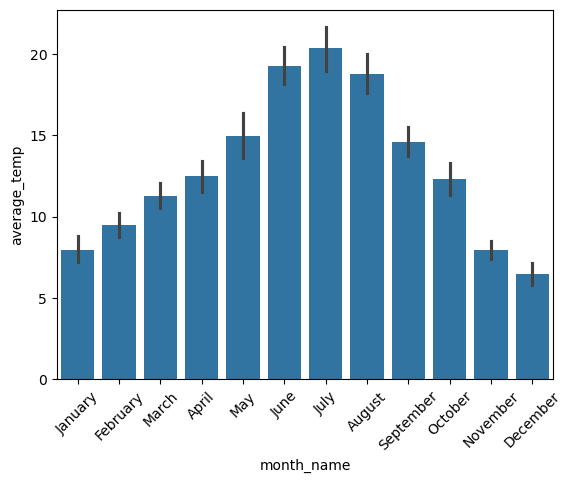

In [896]:
sns.barplot(x='month_name', y='average_temp', data=new_data_2015)
plt.xticks(rotation=45)

<Axes: xlabel='weather', ylabel='average_temp'>

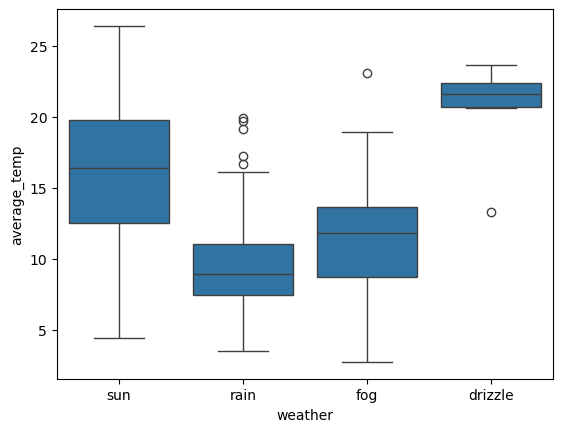

In [898]:
sns.boxplot(x='weather', y='average_temp', data =new_data_2015)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

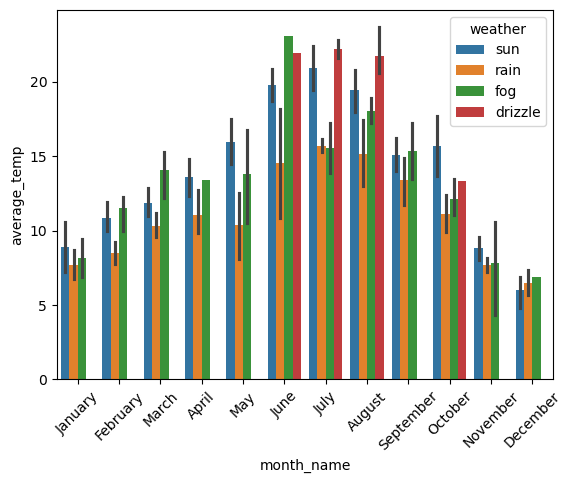

In [900]:
sns.barplot(x='month_name', y='average_temp', hue='weather', data=new_data_2015)
plt.xticks(rotation=45)

<Axes: xlabel='weather', ylabel='average_temp'>

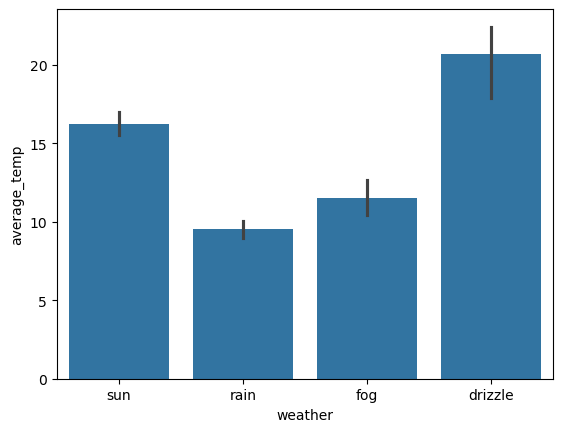

In [901]:
sns.barplot(x='weather', y='average_temp', data =new_data_2015)

<Axes: xlabel='weather', ylabel='average_temp'>

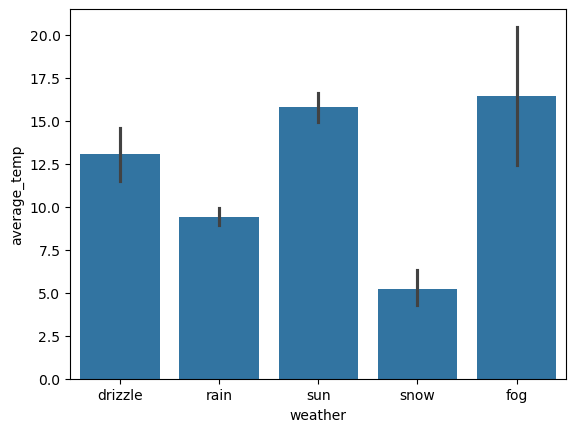

In [904]:
sns.barplot(x='weather', y='average_temp', data =new_data_2012)

<Axes: xlabel='year', ylabel='average_temp'>

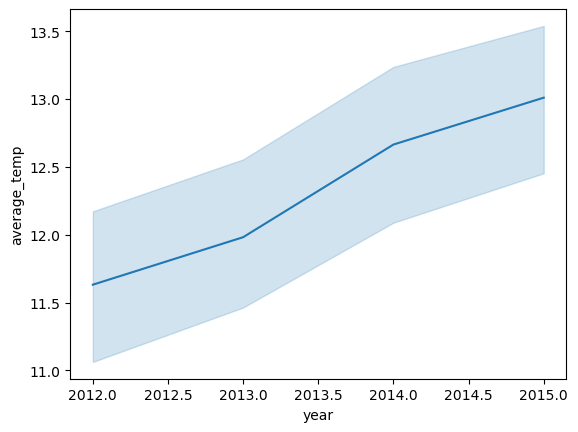

In [906]:
sns.lineplot(x='year', y='average_temp', data =df)

<Axes: xlabel='weather', ylabel='average_temp'>

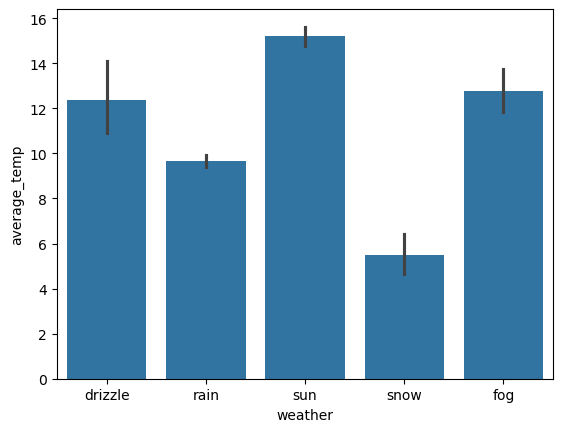

In [908]:
sns.barplot(x='weather', y='average_temp', data =df)

<Axes: xlabel='weather', ylabel='average_temp'>

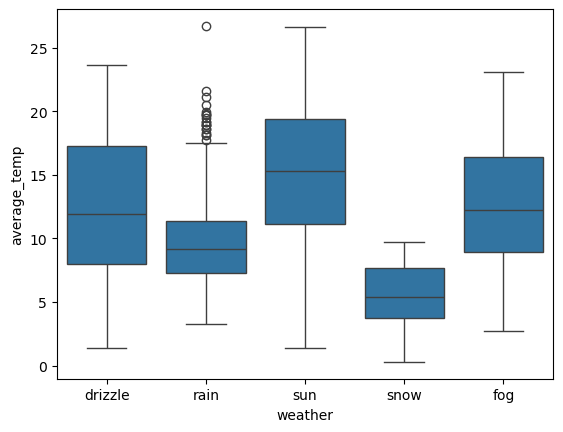

In [910]:
sns.boxplot(x='weather', y='average_temp', data = df)

# Feature engineerring

In [913]:
df['weather'] = df['weather'].replace({'sun':0, 'drizzle':1, 'rain':2, 'fog':3, 'snow':4})

C:\Users\Aditya\AppData\Local\Temp\ipykernel_6556\3309812663.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['weather'] = df['weather'].replace({'sun':0, 'drizzle':1, 'rain':2, 'fog':3, 'snow':4})


In [753]:
df

,day,month,year,month_name,average_temp,precipitation,temp_max,temp_min,wind,weather
0,1,1,2012,January,10.30,0.0,12.8,5.0,4.7,1
1,2,1,2012,January,9.20,10.9,10.6,2.8,4.5,2
2,3,1,2012,January,8.10,0.8,11.7,7.2,2.3,2
3,4,1,2012,January,9.40,20.3,12.2,5.6,4.7,2
4,5,1,2012,January,7.50,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2015,December,3.55,8.6,4.4,1.7,2.9,2
1457,28,12,2015,December,4.15,1.5,5.0,1.7,1.3,2
1458,29,12,2015,December,6.90,0.0,7.2,0.6,2.6,3
1459,30,12,2015,December,6.10,0.0,5.6,-1.0,3.4,0


In [915]:
X = df.drop(columns=['month_name', 'weather'], axis = 1)
Y = df['weather']

In [917]:
print(X)

      day  month  year  average_temp  precipitation  temp_max  temp_min  wind
0       1      1  2012         10.30            0.0      12.8       5.0   4.7
1       2      1  2012          9.20           10.9      10.6       2.8   4.5
2       3      1  2012          8.10            0.8      11.7       7.2   2.3
3       4      1  2012          9.40           20.3      12.2       5.6   4.7
4       5      1  2012          7.50            1.3       8.9       2.8   6.1
...   ...    ...   ...           ...            ...       ...       ...   ...
1456   27     12  2015          3.55            8.6       4.4       1.7   2.9
1457   28     12  2015          4.15            1.5       5.0       1.7   1.3
1458   29     12  2015          6.90            0.0       7.2       0.6   2.6
1459   30     12  2015          6.10            0.0       5.6      -1.0   3.4
1460   31     12  2015          6.65            0.0       5.6      -2.1   3.5

[1461 rows x 8 columns]


In [919]:
print(Y)

0       1
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    3
1459    0
1460    0
Name: weather, Length: 1461, dtype: int64


# Model Testing

In [922]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [924]:
print(X.shape, X_train.shape, X_test.shape)

(1461, 8) (1168, 8) (293, 8)


In [926]:
log_model = LogisticRegression()

In [928]:
log_model.fit(X_train,Y_train)

C:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [930]:
X_train_pred = log_model.predict(X_train)
X_test_pred = log_model.predict(X_test)

In [932]:
train_acc_score = accuracy_score(Y_train, X_train_pred)
test_acc_score = accuracy_score(Y_test, X_test_pred)

print(train_acc_score)
print(test_acc_score)

0.7636986301369864
0.8156996587030717


In [934]:
random_model = RandomForestClassifier()

In [936]:
random_model.fit(X_train,Y_train)

RandomForestClassifier()

In [937]:
X_train_pred = random_model.predict(X_train)
X_test_pred = random_model.predict(X_test)

In [940]:
train_acc_score = accuracy_score(Y_train, X_train_pred)
test_acc_score = accuracy_score(Y_test, X_test_pred)

print(train_acc_score)
print(test_acc_score)

1.0
0.8976109215017065


In [942]:
tree_model = DecisionTreeClassifier()

In [944]:
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [946]:
X_train_pred = tree_model.predict(X_train)
X_test_pred = tree_model.predict(X_test)

In [948]:
train_acc_score = accuracy_score(Y_train, X_train_pred)
test_acc_score = accuracy_score(Y_test, X_test_pred)

print(train_acc_score)
print(test_acc_score)

1.0
0.8327645051194539


In [950]:
svm = SVC(kernel='linear')

In [952]:
svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [954]:
svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [956]:
X_train_pred = svm.predict(X_train)
X_test_pred = svm.predict(X_test)

In [958]:
train_acc_score = accuracy_score(Y_train, X_train_pred)
test_acc_score = accuracy_score(Y_test, X_test_pred)

print(train_acc_score)
print(test_acc_score)

0.8450342465753424
0.8771331058020477


In [960]:
df

,day,month,year,month_name,average_temp,precipitation,temp_max,temp_min,wind,weather
0,1,1,2012,January,10.30,0.0,12.8,5.0,4.7,1
1,2,1,2012,January,9.20,10.9,10.6,2.8,4.5,2
2,3,1,2012,January,8.10,0.8,11.7,7.2,2.3,2
3,4,1,2012,January,9.40,20.3,12.2,5.6,4.7,2
4,5,1,2012,January,7.50,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2015,December,3.55,8.6,4.4,1.7,2.9,2
1457,28,12,2015,December,4.15,1.5,5.0,1.7,1.3,2
1458,29,12,2015,December,6.90,0.0,7.2,0.6,2.6,3
1459,30,12,2015,December,6.10,0.0,5.6,-1.0,3.4,0


In [978]:
new_data = (2, 1, 2012, 9.20, 10.9, 10.6, 2.8, 4.5)
new_data_array = np.array(new_data)
new_data_shape = new_data_array.reshape(1,-1)

In [980]:
prediction = random_model.predict(new_data_shape)

C:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [982]:
print(prediction)

[2]


In [968]:
## random forest classifier is 1
## decision tree classifier is 1
## logistic regression is 0
## svm is 0

In [ ]:
fresh_data = (18, 2, 2025, 5.00, 0.0, 10.0, 